<img align="center" src="../extra/logos/logos.png" width='800px'>

# Carga de datos en el DataCube Chile &#127758;
 
En ese apartado, se verán las operaciones básicas que se pueden realizar con el DataCube:
1. Definir una área de estudio
1. Buscar productos y mediciones
1. Solicitar la información
1. Visualizar la información

Se puede tener una idea de los productos y la cobertura de las imágenes disponibles en el cubo en el [Explorador de imágenes](https://explorer.stage.earth.dataobservatory.net/).


>**Nota**: Este notebook contiene elementos extraídos desde [DataCube Australia](https://github.com/GeoscienceAustralia/dea-notebooks).

>**Nota**: Si tiene problemas para desplegar este notebook, abra una terminal de Linux (File -> New -> Terminal), navegue hasta la carpeta donde está este notebook y escriba `jupyter trust 01_Carga_datos.ipynb`. Luego, vuelva a abrir el notebook.

## 1. Products / Measurements

En primera instancia, es necesario definir qué son cada uno:
1. Products: hace referencia al sensor que obtiene la información/imagen (Landsat 5, Sentinel-2, etc).
1. Measurements: varían de producto en producto y hacen referencia a las bandas/mediciones disponibles para cada sensor. En algunos casos, también incluye las bandas de calidad y otros sub-productos útiles.

Primero, es necesario cargar los paquetes que permiten acceder al DataCube y sus funcionalidades:

In [1]:
import datacube
import pandas as pd
from odc.ui import DcViewer

from datacube.utils.rio import configure_s3_access
configure_s3_access(aws_unsigned=False, requester_pays=True)

Es necesario generar una app del cubo con un nombre. Esto no afecta en nada el desemepño y es solamente por motivos de trazabilidad en caso de algún problema. El nombre puede ser de cualquier tipo, pero se recomienda que sea algo relacionado con la aplicación que se le dará.

In [2]:
dc = datacube.Datacube(app='01_operaciones')

### 1.1 Products

Una vez se tiene la app funcionando (en este caso `dc`), se pueden listar los productos disponibles.

In [3]:
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
asf_s1_rtc,asf_s1_rtc,Sentinel 1 Radiometrically Terrain Corrected,CC-BY-4.0,EPSG:4326,"(-0.0002, 0.0002)"
asf_s1_rtc_grd_hd,asf_s1_rtc_grd_hd,Sentinel 1 Radiometrically Terrain Corrected,CC-BY-4.0,EPSG:4326,"(-0.0002, 0.0002)"
asf_s1_rtc_grd_hs,asf_s1_rtc_grd_hs,Sentinel 1 Radiometrically Terrain Corrected,CC-BY-4.0,EPSG:4326,"(-0.0002, 0.0002)"
copernicus_dem_30,copernicus_dem_30,Copernicus 30m Digital Elevation Model (GLO-30),None,None,None
copernicus_dem_90,copernicus_dem_90,Copernicus 90m Digital Elevation Model (GLO-90),None,None,None
fasat_charlie,fasat_charlie,FASat Charlie data,None,None,None
landsat5_c2l2_sr,landsat5_c2l2_sr,Landsat 5 Collection 2 Level-2 Surface Reflect...,None,None,None
landsat5_c2l2_st,landsat5_c2l2_st,Landsat 5 Collection 2 Level-2 UTM Surface Tem...,CC-BY-4.0,None,None
landsat5_geomedian_annual,landsat5_geomedian_annual,Surface Reflectance Annual Geometric Median an...,None,EPSG:6933,"(-30, 30)"


Actualmente está disponible la serie completa de Landsat (5, 7 y 8), Sentinel-2 y el DEM SRTM. Como se puede apreciar en el listado, existe más de una definición para la serie Landsat, cuya principal diferencia es si están en un bucket propio del DO o son parte de buckets públicos de AWS. Se recomienda utilizar las fuentes provenientes de este último.

Para poder diferenciarlos, en el caso de Landsat el nombre contiene `aws` (en la columna `name` de la tabla anterior); por ejemplo, usgs_aws_l8c2_sr, usgs_aws_l7c2_sr y usgs_aws_l5c2_sr. Esta serie cubre todo Chile y está actualizada a la fecha más reciente. Por otro lado, aquellas imágenes Landsat que están el bucket propio, contienen `espa` en su nombre (usgs_espa_ls8c1_sr).

### 1.2 Measurements

Cada producto, contiene mediciones (`measurements`) a las cuáles es posible acceder. A continuación se muestra un listado de las mediciones disponibles para dos sensores (Landsat 8 y Sentinel-2)

In [4]:
products = ['landsat9_c2l2_sr', 's2_l2a']
dc.list_measurements().loc[products]

name   dtype        units  nodata  \
product          measurement                                            
landsat9_c2l2_sr coastal         coastal  uint16  reflectance     0.0   
                 blue               blue  uint16  reflectance     0.0   
                 green             green  uint16  reflectance     0.0   
                 red                 red  uint16  reflectance     0.0   
                 nir08             nir08  uint16  reflectance     0.0   
                 swir16           swir16  uint16  reflectance     0.0   
                 swir22           swir22  uint16  reflectance     0.0   
                 qa_pixel       qa_pixel  uint16    bit_index     1.0   
                 qa_aerosol   qa_aerosol   uint8    bit_index     1.0   
                 qa_radsat     qa_radsat  uint16    bit_index     1.0   
s2_l2a           B01                 B01  uint16            1     0.0   
                 B02                 B02  uint16            1     0.0   
                 B03                 B03  uint16            1     0.0   
                 B04                 B04  uint16            1     0.0   
                 B05                 B05  uint16            1     0.0   
                 B06                 B06  uint16            1     0.0   
                 B07                 B07  uint16            1     0.0   
                 B08                 B08  uint16            1     0.0   
                 B8A                 B8A  uint16            1     0.0   
                 B09                 B09  uint16            1     0.0   
                 B11                 B11  uint16            1     0.0   
                 B12                 B12  uint16            1     0.0   
                 SCL                 SCL   uint8            1     0.0   
                 AOT                 AOT  uint16            1     0.0   
                 WVP                 WVP  uint16            1     0.0   

                                                                     aliases  \
product          measurement                                                   
landsat9_c2l2_sr coastal                [SR_B1, band_1, B1, coastal_aerosol]   
                 blue                                    [SR_B2, band_2, B2]   
                 green                                   [SR_B3, band_3, B3]   
                 red                                     [SR_B4, band_4, B4]   
                 nir08                              [SR_B5, band_5, B5, nir]   
                 swir16                           [SR_B6, band_6, B6, swir1]   
                 swir22                           [SR_B7, band_7, B7, swir2]   
                 qa_pixel     [pixel_quality, level2_qa, QA_PIXEL, pixel_qa]   
                 qa_aerosol          [sr_aerosol, SR_QA_AEROSOL, aerosol_qa]   
                 qa_radsat             [saturation_qa, QA_RADSAT, radsat_qa]   
s2_l2a           B01                              [band_01, coastal_aerosol]   
                 B02                                         [band_02, blue]   
                 B03                                        [band_03, green]   
                 B04                                          [band_04, red]   
                 B05                                   [band_05, red_edge_1]   
                 B06                                   [band_06, red_edge_2]   
                 B07                                   [band_07, red_edge_3]   
                 B08                                   [band_08, nir, nir_1]   
                 B8A                            [band_8a, nir_narrow, nir_2]   
                 B09                                 [band_09, water_vapour]   
                 B11                              [band_11, swir_1, swir_16]   
                 B12                              [band_12, swir_2, swir_22]   
                 SCL                                              [mask, qa]   
                 AOT                             [aerosol_optica

Cada una de estas filas se corresponde con una "banda" del sensor. Como se puede apreciar, no todas corresponden a mediciones directas realizadas por el sensor. En el caso de Landast y Sentinel, siempre están presentes bandas de calidad. También hay algunos sub-productos en algunos casos.

Hay que prestar atención a las columnas `dtype`, `units` y `nodata`. En ellas se indican el tipo de dato (entero corto, largo, flotante, etc), las unidades y el valor de datos NA. Hay que tenerlos presente al momento de trabajar con alguna de estas métricas. Por ejemplo, las bandas de reflectancia poseen tipo entero (uint16), pero la reflectancia posee valores en el rango `[0-1]`; es por esta razón que es necesario escalar la información (10.000 en este caso).

## 2. Cargar información

Para poder cargar las imágenes deseadas, es necesario definir algunos puntos primero:

1. Definir producto
1. Definir ventana espacial de trabajo (latitud, longitud).
1. Definir ventana temporal de trabajo.
1. Definir una proyección de salida.
1. Definir una resolución de salida.

Y la forma de cargar el requerimiento en el cubo:

In [5]:
longitud_rango = (-73.5, -72.5)
latitud_rango = (-40, -39)

In [6]:
ds = dc.load(product=products[0],
             x=longitud_rango,
             y=latitud_rango,
             time=("2022-02-01", "2022-04-30"),
             output_crs='EPSG:32719',
             resolution=(-30, 30),
             dask_chunks={"time": 1, 'x':2048, 'y':2048}
            )

/env/lib/python3.8/site-packages/datacube/drivers/postgres/_api.py:564: SAWarning: Class CommonTimestamp will not make use of SQL compilation caching as it does not set the 'inherit_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this object can make use of the cache key generated by the superclass.  Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  return self._connection.execute(select_query)
/env/lib/python3.8/site-packages/datacube/drivers/postgres/_api.py:564: SAWarning: Class Float8Range will not make use of SQL compilation caching as it does not set the 'inherit_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this att

Antes de mirar el objeto, hay que destacar que se puede solicitar la información en una resolución diferente a la nativa. Para ello, basta con modificar la opción de resolución a la deseada. Por defecto, se utiliza el método de remuestreo "nearest neighbour", pero los siguientes están también disponibles (agregando por ejemplo, la opción `resampling= "cubic"`:
```
"nearest", "cubic", "bilinear", "cubic_spline", "lanczos", 
"average", "mode", "gauss", "max", "min", "med", "q1", "q3"
```

>**Nota**: Las unidades de la opción `resolution` corresponden a las unidades del crs específicado en `output_crs`. Hay que prestar atención a que normalmente el primer elemento es negativo, dada la forma en que se almacenan las coordenadas en las imágenes (el inicio está esquina superior izquierda) y la forma en que operan la mayoría de los crs (con un "inicio" en la esquina inferior izquierda).

También es posible añadir la opción `group_by= "solar_day"` para que escenas de diferentes horas (diferentes 'tiles'), pero un mismo día queden en el cubo como si fuera una sola gran escena (si pertecene al mismo día).

Ahora, un vistazo al objeto resultado:

In [7]:
ds

<xarray.Dataset>
Dimensions:      (time: 17, y: 3830, x: 3032)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-08T14:35:31.279357 ... 2022-04...
  * y            (y) float64 5.677e+06 5.677e+06 ... 5.563e+06 5.563e+06
  * x            (x) float64 1.103e+05 1.103e+05 ... 2.012e+05 2.012e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

De esta salida, hay un par de cosas a las que prestar atención. 

Primero, el tipo de objeto resultante. `OpenDataCube` funciona sobre la librería [`xarray`](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/00_overview.html), la cual permite trabajar en multiples dimensiones de manera eficiente. La estructura de datos es muy similar al formato [NetCDF](https://psl.noaa.gov/data/gridded/whatsnetCDF.html) y una de las principales ventajas, es que permite trabajar con la librería [`Dask`](https://dask.org/), la cual permite paralelizar cargas de trabajo.

1. ***Dimensions***: es un listado simple, que identifica las dimensiones del arreglo. En este caso es tridimencinoal con (tiempo, latitud, longitud), pero cualquier otra combinación es posbible (1, 2, 3, 4,...., X dimensiones).
1. ***Coordinates***: identifica el valor de cada una de las dimensiones, en cada uno de sus "instantes". En este caso `time` representa la fecha para cada tiempo y `x` e `y` son las coordenadas geográficas de cada pixel.
1. ***Data variables***: son las mediciones, normalmente "bandas" del sensor, pero puede ser cualquier otro tipo. En este caso, por cada unidad `time`, existe una imagen completa con coordenadas `x`, `y` (un objeto `xarray.DataArray`).
1. ***Attributes***: identifica el sistema de coordenadas de referencia de la información cargada.

Se puede ver con mayor detalle alguna de las variables/mediciones. En el fondo esta una colección dentro de otra.

In [8]:
ds['nir08'] # es equivalente a ds.nir

<xarray.DataArray 'nir08' (time: 17, y: 3830, x: 3032)>
dask.array<dc_load_nir08, shape=(17, 3830, 3032), dtype=uint16, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2022-02-08T14:35:31.279357 ... 2022-04...
  * y            (y) float64 5.677e+06 5.677e+06 ... 5.563e+06 5.563e+06
  * x            (x) float64 1.103e+05 1.103e+05 ... 2.012e+05 2.012e+05
    spatial_ref  int32 32719
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

Del objeto anterior, es importante resaltar algunos aspectos

1. Bytes: Tamaño total de la colección, y el tamaño de cada chunk.
1. Shape: Dimensiones del arreglo. En este caso es (tiempo, y, x) para toda la colección solicitada y para cada chunk. En este último caso, un chunk sólo abarca un tiempo.
1. Count: Número de tareas pendientes y número de chunks. A mayor tamaño del chunk, menor número de tareas a calcular.
1. Type: tipo de datos (entero, flotante, etc) y estructura (numpy array, dask array, etc).

>**Nota**: El tamaño "ideal" del chunk, debiera rondar los 100 MB.

Por lo demás, las coordenadas y atributos son similares al objeto anterior.

Un punto importante sobre el funcionamiento del DataCube, es que `xarray` es *lazy*, lo que quiere decir que no hace todo los cálculos en el momento en que se escribe, si no que lo hace sólo cuando es necesario. Es importante tener esto presente, porque por cada acción que se le solicita al cubo, se van acumulando tareas y si se llega a un número demasiado alto, al momento de hacer un cálculo tomará demasiado tiempo y el sistema podría colapsar.

Cuando se llega a un punto en que se sabe que se sabe será utilizado como base para otros (en el fondo un checkpoint), es posible pedirle al cubo que resuelva todas las tareas pendientes por medio de `ds.persist()`. Más adelante (próximo notebook) se verán algunos ejemplos, pero es importante tenerlo persente.

>**Nota**: ¿Cuándo invocar `persist()`? No hay una regla definitiva, pero normalmente, cuando se han acumulado alrededor de 50.000 Tasks. También es bueno invocarlo antes de por ejemplo pedir varias métricas diferentes sobre el mismo arreglo, caso contrario, cada vez que se pide una métrica se debe calcular todo cada vez (esto incluye la generación de imágenes).

## 3. Visualizaciones

La visualización de información es una etapa crucial en el manejo de información satelital. En este apartado se verá como desplegar la zona de estudio, mostrar una banda en particular y generar algunos compuestos.

### 3.1 Área de estudio

En primera instancia, se pude ver la zona de estudio definida anteriormente en un mapa interactivo. Con esto se puede revisar que la zona sea la apropiada para cubrir el fenómeno a estudiar de manera correcta.

>**Nota**: Antes de ejecutar las siguientes lineas, clone el repositorio de `dea-notebooks` usando `git clone https://github.com/GeoscienceAustralia/dea-notebooks.git` en el directorio raíz (home).

In [9]:
%matplotlib inline

import sys
sys.path.append("../../dea-notebooks/Tools")

from dea_tools.plotting import display_map, rgb

In [10]:
display_map(x=longitud_rango, y=latitud_rango)

### 3.2 Visualizar bandas de cada imagen

Antes de mirar algunas mediciones, es bueno volver a revisar el objeto que se tiene:

In [11]:
ds

<xarray.Dataset>
Dimensions:      (time: 17, y: 3830, x: 3032)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-08T14:35:31.279357 ... 2022-04...
  * y            (y) float64 5.677e+06 5.677e+06 ... 5.563e+06 5.563e+06
  * x            (x) float64 1.103e+05 1.103e+05 ... 2.012e+05 2.012e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

Es posible seleccionar una de estas bandas y visualizarla. Existe una salvedad, y es que en este caso la imagen también tiene 13 tiempos, por lo que es necesario definir uno de ellos primero.

In [12]:
primera_imagen = ds['green'].isel(time=0)   # o ds.green.isel(time=0)
primera_imagen

<xarray.DataArray 'green' (y: 3830, x: 3032)>
dask.array<getitem, shape=(3830, 3032), dtype=uint16, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2022-02-08T14:35:31.279357
  * y            (y) float64 5.677e+06 5.677e+06 ... 5.563e+06 5.563e+06
  * x            (x) float64 1.103e+05 1.103e+05 ... 2.012e+05 2.012e+05
    spatial_ref  int32 32719
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

Aquí es importante destacar al menos dos cosas:

1. Como se seleccionó una unidad de tiempo en particular, dicha dimensión fue descartada del arreglo (ahora posee dimensiones `x`, `y` solamente. El tiempo (`time`), pasó a ser una etiqueta informativa solamente.
2. Se utilizó `isel`, que realiza una selección por ubicación y no por el valor. En este caso `isel=0` selecciona la primera fecha disponible. `isel=1` seleccionará la segunda fecha disponible y así hasta el largo de la dimensión. Para seleccionar por el valor y no la posición se utiliza `sel`, que en este caso sería `sel='2022-01-14'`.

>**Nota**: Es importante notar que Python cuenta la posición en los arreglos de cualquier tipo, partiendo por 0. Así, para acceder al primer elemento de un vector (por ejemplo `mi_vector`) de largo 10, se utiliza `mi_vector[0]`; para acceder al último elemento, se puede utilizar `mi_vector[9]` o `mi_vector[-1]`. Si se utiliza `mi_vector[10]` arrojará un error porque no encuentra el elemento.

Para graficar la selección, basta con usar el método `plot()` del objeto:

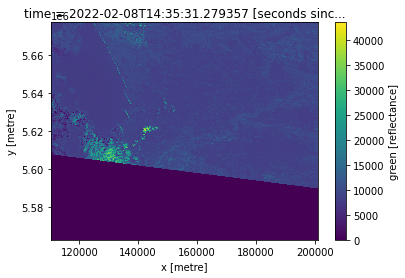

In [13]:
primera_imagen.plot()

Si se quieren visualizar las primeras 3 escenes por ejemplo:

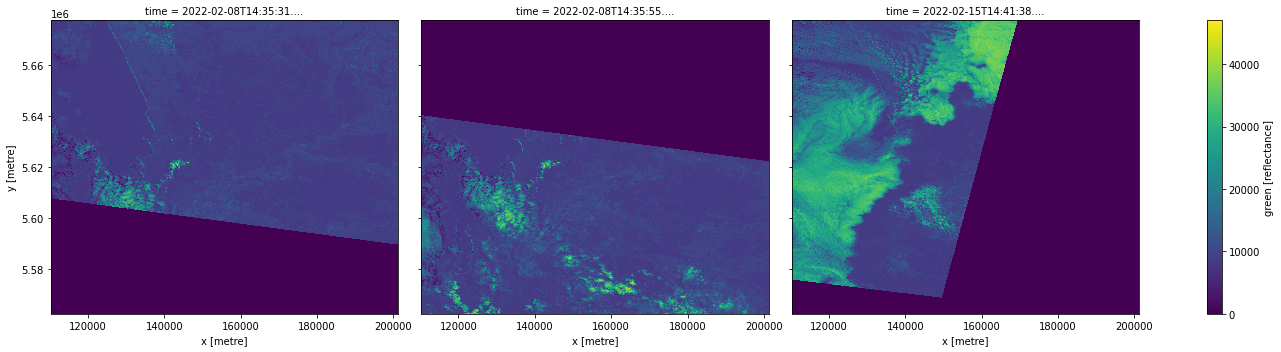

In [14]:
ds['green'].isel(time=range(3)).plot(col='time', figsize=(20, 5))

Para mayor información sobre este tipo de gráficos, revisar la [documentación de xarray](http://xarray.pydata.org/en/stable/user-guide/plotting.html#faceting)

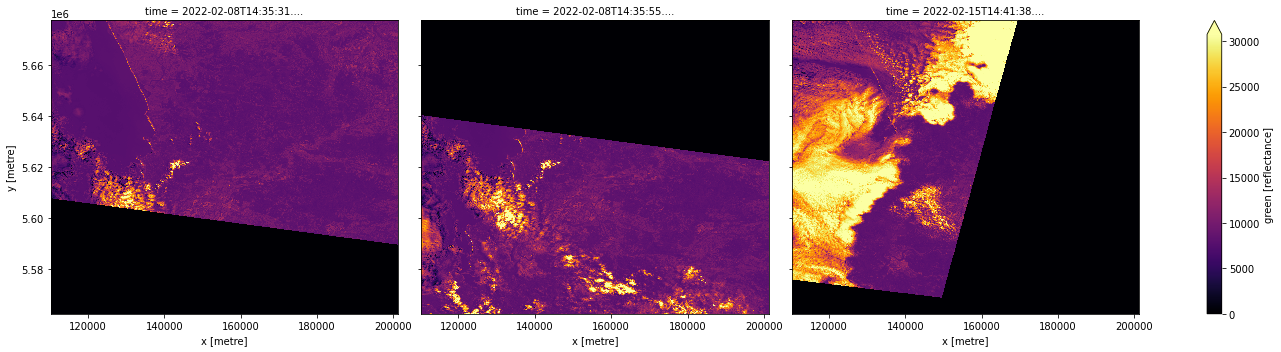

In [15]:
ds['green'].isel(time=range(3)).plot(col='time', robust=True, cmap='inferno', figsize=(20, 5)) # interpolate='none'

### 3.3 Visualizar imagen en colores RGB

Visualizar en colores es un poco más complicado, pero aquí se verán dos formas. 

Primero, utilizando la función `rgb` de DEA (cargada previamente):

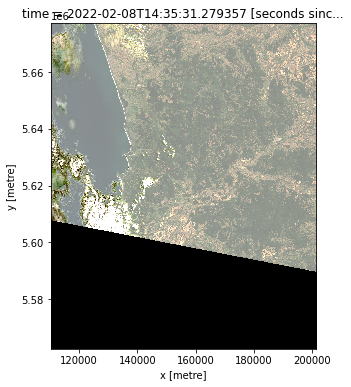

In [16]:
rgb(ds, bands=["red", "green", "blue"], index=0)

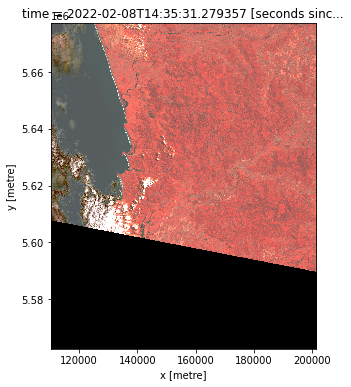

In [17]:
rgb(ds, bands=["nir08", "green", "blue"], index=0)

Alternativamente, de una forma más manual pero que permite mayor control:

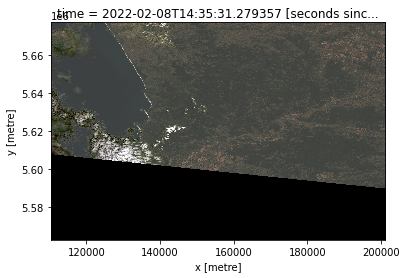

In [18]:
ds[["red", "green", "blue"]].isel(time=0).to_array().plot.imshow(vmin=0, vmax=30000)

# Mini - Tarea

Repita este notebook, pero utilice una zona/sensor diferente al de los ejemplos (no utilice una zona muy extensa o una ventana temporal demasiado amplia).

1. Explorar diferentes ventanas espacio-temporales. Uitilice el explorador para verificar la extensión de las escenas y encontrar lugares con imágenes.
1. Explorar diferentes productos.
1. Probar diferentes configuraciones de consulta.
1. Explorar visualizaciones.

## *Siguientes pasos*

Para continuar el entrenamiento, un listado con los notebooks de esta sesión

1. [Acceso y configuración](00_Acceso_configuración.ipynb)
2. **Cargar datos**
3. [Análisis básico](02_Análisis_básico.ipynb)
4. [Estudio de caso](03_Estudio_caso.ipynb)
5. [Trabajo final](04_Actividad_final.ipynb)